In [29]:
## Classification using ANN (Telecom Churn Dataset)

In [30]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

np.random.seed(500)

In [31]:
telchurn = pd.read_csv("/home/ashwin/data_science/0ashwin/fy-msc-work/fy_sem2_prac/ml/3/Telecom_Churn_Data.csv")
telchurn.drop('customerID', axis=1, inplace=True)
telchurn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
telchurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
# Check for missing values
telchurn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
# Converting to correct data types and Preprocessing
telchurn.SeniorCitizen = telchurn.SeniorCitizen.astype("category")
telchurn["TotalCharges"] = pd.to_numeric(telchurn["TotalCharges"], errors='coerce')
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
telchurn["Churn"] = telchurn["Churn"].map({'Yes': 1, "No": 0})

cat_cols = ['gender','SeniorCitizen', 'Partner','Dependents','PhoneService','MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
             'PaymentMethod', ]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

num_cols = ["TotalCharges"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor)]
)

X = telchurn.drop('Churn', axis=1)
y = telchurn["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train = clf.fit_transform(X_train)
X_test = clf.transform(X_test)

In [35]:
X_train.shape

(5634, 44)

In [36]:
model = Sequential()
model.add(Dense(16, input_dim=44,  activation='relu'))
model.add(Dense(32, kernel_initializer='uniform'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,  activation='sigmoid' ))

In [37]:
model.compile(loss='binary_crossentropy',   
             optimizer='adam',
             metrics=['accuracy'])

In [38]:
ckpt_model = 'telchurn.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [39]:
print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train.values,
                    validation_data=(X_test, y_test.values),
                    epochs=50,
                    batch_size=16,
                    )

Starting training...
Epoch 1/50
353/353 [==============================] - 1s 3ms/step - loss: 0.4668 - accuracy: 0.7764 - val_loss: 0.4443 - val_accuracy: 0.7935
Epoch 2/50
353/353 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.7922 - val_loss: 0.4471 - val_accuracy: 0.7800
Epoch 3/50
353/353 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8009 - val_loss: 0.4441 - val_accuracy: 0.7963
Epoch 4/50
353/353 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8019 - val_loss: 0.4434 - val_accuracy: 0.7885
Epoch 5/50
353/353 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8087 - val_loss: 0.4420 - val_accuracy: 0.7928
Epoch 6/50
353/353 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8080 - val_loss: 0.4447 - val_accuracy: 0.7871
Epoch 7/50
353/353 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8103 - val_loss: 0.4381 - val_ac

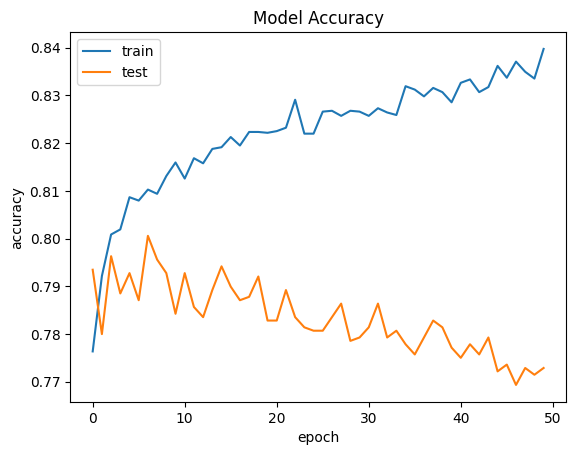

In [40]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

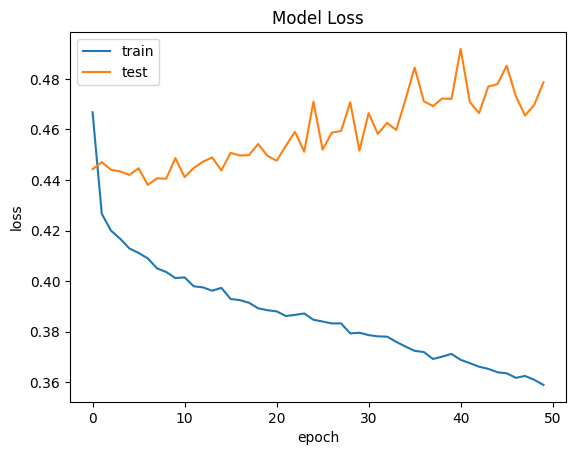

In [41]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [42]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.29%
